# Experiment 1 - Common use case, optimizing N threads

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [2]:
folder_path1    = 'results/optimal_threads_1/'
number_of_runs  = 1
number_of_tests = 64

Set files to read

In [3]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [13]:
data = []
        
fetch_data(folder_path1, file_names, data, ["Runtime"])
        
dataset = []

num_workers_min = 1
num_workers_max = 64
num_workers_step = 1

num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)

nwv_len = len(num_workers_values)

num_workers = num_workers_values[0]

for i in range(len(data)):
    num_workers = num_workers_values[i % nwv_len]
    dataset.append([256, num_workers, data[i].mean()[0], "mulpd_hard: 750"])

dataset = pd.DataFrame(dataset)
dataset.columns = ["Grid Size", "Num Workers", "Time", "Kernel Repeats"]

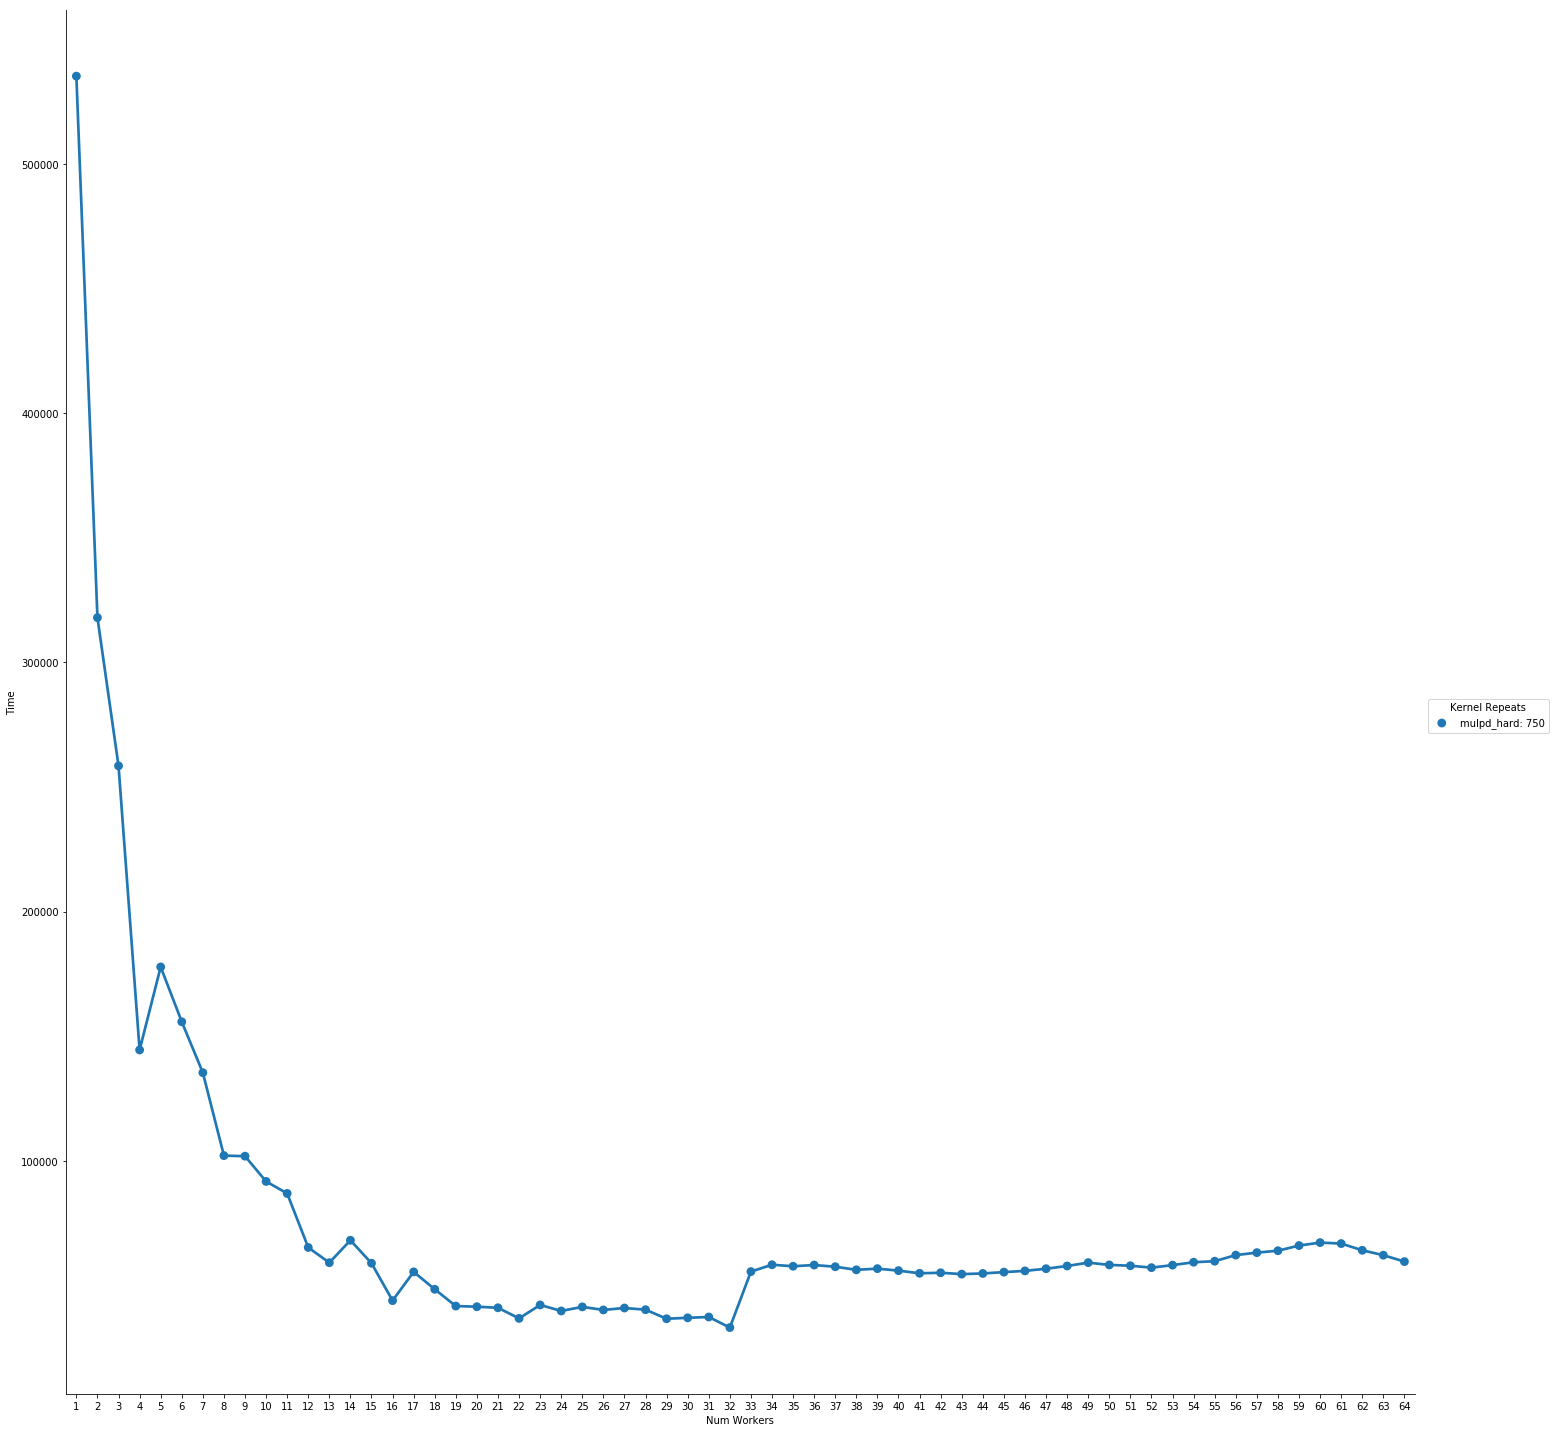

In [16]:
sns.factorplot(x="Num Workers", y="Time",
               hue="Kernel Repeats",
               data=dataset, size=20);

plt.savefig("graphs/optimal_threads_1/optimal_threads_1.png")
plt.show()